## Expense Processing Efficiency Analysis (Flag 22)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To analyze and understand how the cost of an expense influences its processing time, with the aim of improving the efficiency and equity of expense report processing across all cost brackets.

**Role**: Financial Operations Analyst

**Difficulty**: 3 out of 5.

**Category**: Finance Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the expense analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further plotting. This also checks the initial few rows to verify the correct loading of the data.

In [2]:
dataset_path = "csvs/flag-22.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,department,type,state,processed_date,user,amount,category,source_id,opened_at,number,short_description,ci
0,Customer Support,NaN,Processed,2023-04-29 04:20:00,Shelley Groden,1158,Travel,NaN,2023-04-23 04:20:00,EXP00000000,Travel related hardware asset,Dell Latitude 7420
1,Product Management,NaN,Declined,NaN,Mamie Mcintee,1988,Services,BME-72243876,2023-12-23 01:44:00,EXP00000001,Registered new service hardware asset,Virtual Private Network Service
2,Customer Support,NaN,Pending,NaN,Marianne Earman,5424,Assets,DKA-86353102,2023-06-02 19:47:00,EXP00000002,Asset Acquisition: High-Performance Dell Optip...,Dell Optiplex 7090
3,IT,NaN,Processed,2023-04-05 00:44:00,Vernon Engelman,7724,Assets,DGP-68065803,2023-03-07 00:44:00,EXP00000003,Automatically recorded entry for new assets ac...,Dell Latitude 7410
4,Customer Support,NaN,Processed,2023-07-27 11:03:00,Mabel Weeden,7603,Assets,ZTI-08993736,2023-06-27 11:03:00,EXP00000004,Automatically created asset registration,Dell Latitude 7450



### **Question 1: Which departments have higher proportions of expense rejections compared to the organizational average?**


#### Plot processing time versus expense amount analysis!

This cell provides a scatter plot to explore the relationship between the amount of each expense and the time taken to process it. By plotting the expense amount against the processing time in days, we can visually assess trends or patterns that may indicate the influence of expense processing. Each point on the plot represents an individual expense transaction, with the position indicating both its cost and how quickly it was processed.


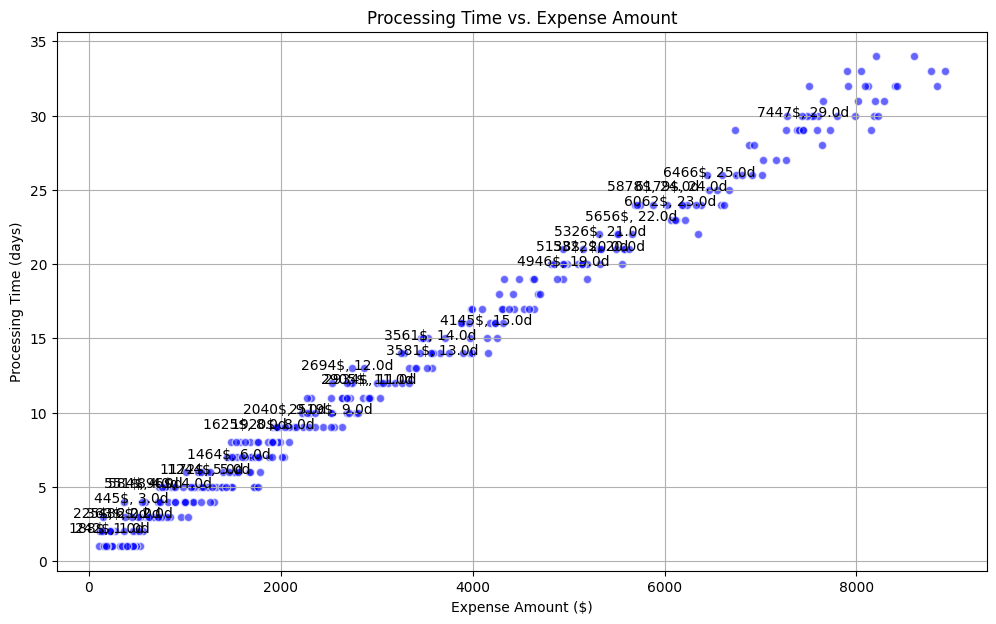

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is the DataFrame containing your data
flag_data['opened_at'] = pd.to_datetime(flag_data['opened_at'])
flag_data["processed_date"] = pd.to_datetime(flag_data["processed_date"])
# Calculate the difference in days between 'opened_at' and 'process_date'
flag_data['processing_time'] = (flag_data['processed_date'] - flag_data['opened_at']).dt.days

# Create a scatter plot of amount vs. processing time
plt.figure(figsize=(12, 7))
plt.scatter(flag_data['amount'], flag_data['processing_time'], alpha=0.6, edgecolors='w', color='blue')
plt.title('Processing Time vs. Expense Amount')
plt.xlabel('Expense Amount ($)')
plt.ylabel('Processing Time (days)')
plt.grid(True)

# Annotate some points with amount and processing time for clarity
for i, point in flag_data.sample(n=50).iterrows():  # Randomly sample points to annotate to avoid clutter
    plt.annotate(f"{point['amount']}$, {point['processing_time']}d", 
                 (point['amount'], point['processing_time']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "diagnostic",
    "insight": "There is a positive correlation between expense amount and processing time, lower-cost expenses are processed faster than higher-cost ones",
    "insight_value": {
        "description": "Lower-cost expenses are processed faster than higher-cost ones, indicating that expense amount significantly influences processing efficiency."
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Processing Time vs. Expense Amount",
        "x_axis": {
            "name": "Expense Amount ($)",
            "value": "Continuously variable amounts",
            "description": "This axis represents different expense amounts submitted for processing."
        },
        "y_axis": {
            "name": "Processing Time (days)",
            "value": "Number of days taken to process each expense",
            "description": "This axis displays the processing time in days, highlighting the time taken from submission to approval or rejection."
        },
        "description": "The scatter plot demonstrates a clear trend where expenses with lower costs are processed more quickly than those with higher costs. The graph shows that as the amount of the expense increases, the processing time also tends to increase, suggesting a relationship where higher expenses perhaps undergo more rigorous scrutiny or additional approval steps."
    },
    "question": "Is there a statistically significant correlation between the cost of an expense and its processing time?",
    "actionable_insight": {
        "description": "Given the observed correlation, the organization should consider streamlining the approval process for higher-cost expenses to enhance efficiency. This might include revisiting the steps involved in the verification and approval of more substantial expenses or possibly introducing automated systems to handle initial checks. Adjusting the workflow to ensure that higher-cost expenses are not unduly delayed could improve overall operational efficiency and reduce potential bottlenecks in financial processing. This adjustment will help maintain a balanced workflow where expenses of all amounts are processed in a timely manner, irrespective of their value."
    }
}


{'data_type': 'diagnostic',
 'insight': 'There is a positive correlation between expense amount and processing time, lower-cost expenses are processed faster than higher-cost ones',
 'insight_value': {'description': 'Lower-cost expenses are processed faster than higher-cost ones, indicating that expense amount significantly influences processing efficiency.'},
 'plot': {'plot_type': 'scatter',
  'title': 'Processing Time vs. Expense Amount',
  'x_axis': {'name': 'Expense Amount ($)',
   'value': 'Continuously variable amounts',
   'description': 'This axis represents different expense amounts submitted for processing.'},
  'y_axis': {'name': 'Processing Time (days)',
   'value': 'Number of days taken to process each expense',
   'description': 'This axis displays the processing time in days, highlighting the time taken from submission to approval or rejection.'},
  'description': 'The scatter plot demonstrates a clear trend where expenses with lower costs are processed more quickly tha

### **Question 2:  What is the distribution of Expense Reports by Department?**


#### Plot average processing time by expense amount category

This bar chart illustrates the average processing time for expense reports categorized by different expense amounts. The categories are divided into four distinct ranges: Low (under $1000), Medium ($1000-$3000), High ($3000-$6000), and Very High (over $6000). Each bar represents the average number


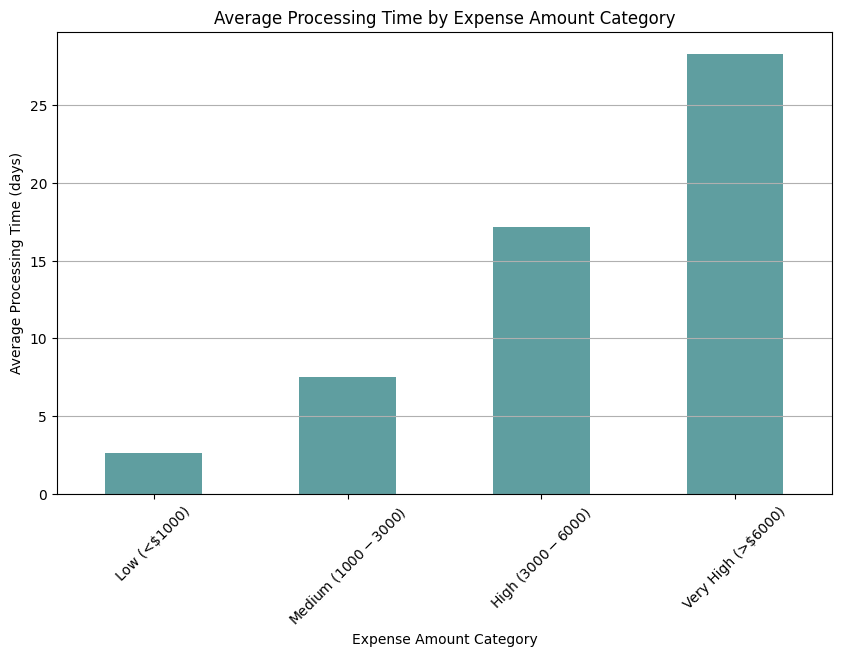

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Define bins for the expense amounts and labels for these bins
bins = [0, 1000, 3000, 6000, 9000]
labels = ['Low (<$1000)', 'Medium ($1000-$3000)', 'High ($3000-$6000)', 'Very High (>$6000)']
flag_data['amount_category'] = pd.cut(flag_data['amount'], bins=bins, labels=labels, right=False)

# Calculate the average processing time for each category
average_processing_time = flag_data.groupby('amount_category')['processing_time'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
average_processing_time.plot(kind='bar', color='cadetblue')
plt.title('Average Processing Time by Expense Amount Category')
plt.xlabel('Expense Amount Category')
plt.ylabel('Average Processing Time (days)')
plt.xticks(rotation=45)  # Rotate labels to fit them better
plt.grid(True, axis='y')

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "There are longer processing times for Higher-Cost Expenses",
    "insight_value": {
        "description": "Expenses within higher cost brackets experience significantly longer processing times, with the longest delays occurring in the highest bracket."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Expense Cost Bracket",
        "x_axis": {
            "name": "Expense Cost Bracket",
            "value": ["<$1000", "$1000-$3000", "$3000-$6000", ">$6000"],
            "description": "This axis categorizes expenses into four distinct cost brackets, ranging from less than $1000 to over $6000."
        },
        "y_axis": {
            "name": "Average Processing Time (days)",
            "value": {
                "<$1000": "3 days",
                "$1000-$3000": "7.5 days",
                "$3000-$6000": "17 days",
                ">$6000": "27 days"
            },
            "description": "This axis displays the average processing time in days for each cost bracket, clearly showing an increase in processing time as expense amounts rise."
        },
        "description": "The bar chart vividly illustrates the relationship between expense amounts and their processing times. It is evident that as the expense amount increases, so does the processing time, with the very high expense bracket (> $6000) averaging 27 days, which is significantly longer compared to lower brackets."
    },
    "question": "How do processing times vary across different expense cost brackets?",
    "actionable_insight": {
        "description": "To improve efficiency and reduce delays in the processing of high-cost expenses, it is advisable for the organization to review and potentially streamline the approval workflows for larger expenses. Implementing more efficient review processes, possibly through automated pre-approvals for certain expense types or introducing tiered approval levels based on expense magnitude, could help reduce these processing times. Additionally, ensuring that staff responsible for approvals are adequately trained to handle high-cost expenses swiftly and accurately may also aid in decreasing the average processing days."
    }
}


{'data_type': 'descriptive',
 'insight': 'There are longer processing times for Higher-Cost Expenses',
 'insight_value': {'description': 'Expenses within higher cost brackets experience significantly longer processing times, with the longest delays occurring in the highest bracket.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Expense Cost Bracket',
  'x_axis': {'name': 'Expense Cost Bracket',
   'value': ['<$1000', '$1000-$3000', '$3000-$6000', '>$6000'],
   'description': 'This axis categorizes expenses into four distinct cost brackets, ranging from less than $1000 to over $6000.'},
  'y_axis': {'name': 'Average Processing Time (days)',
   'value': {'<$1000': '3 days',
    '$1000-$3000': '7.5 days',
    '$3000-$6000': '17 days',
    '>$6000': '27 days'},
   'description': 'This axis displays the average processing time in days for each cost bracket, clearly showing an increase in processing time as expense amounts rise.'},
  'description': 'The bar chart viv

### **Question 3:  How do processing times vary across different expense cost brackets?**


#### Distribution of Expense Amounts by State Across Cost Brackets

This stacked bar chart displays the distribution of expense report states across different cost brackets, providing a view of how expenses are processed based on their amounts. The brackets range from less than $100 to over $5000, illustrating a visual breakdown of processing outcomes for each of category.

This is to understand whether the cost of an expense influences its likelihood of being approved or declined, as well as the general efficiency.


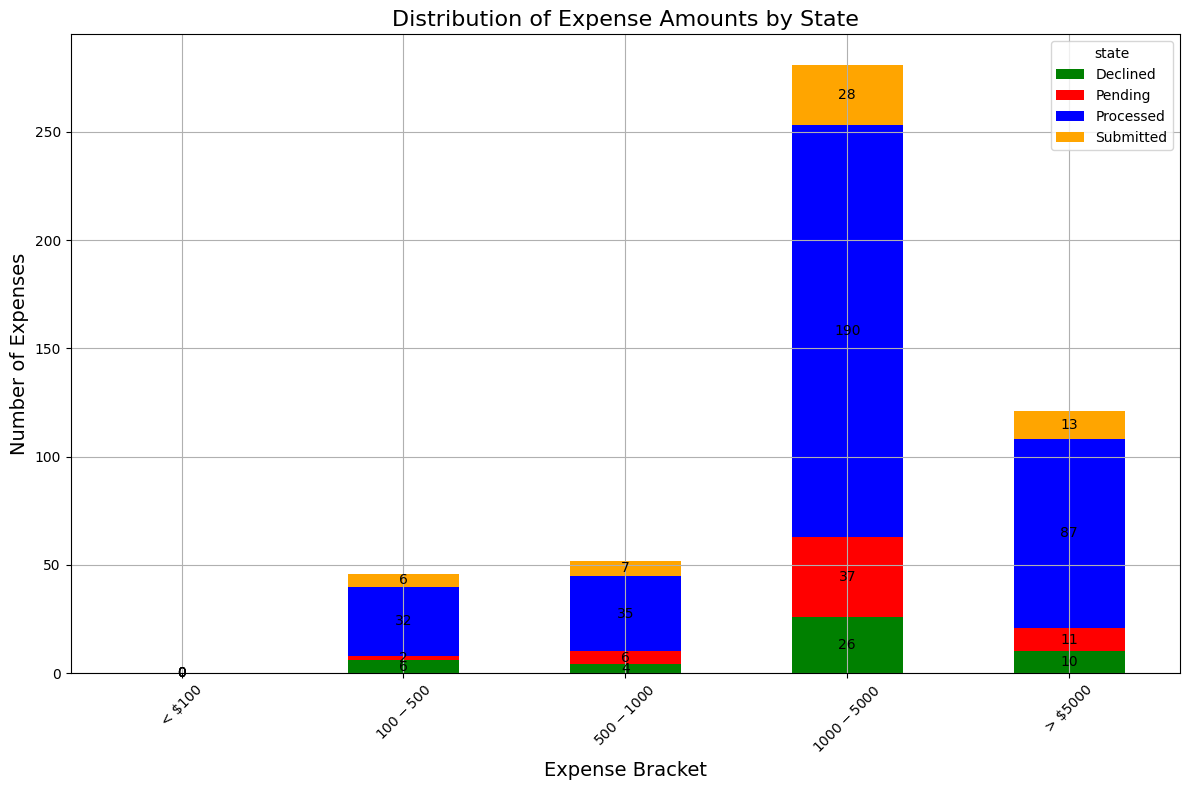

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Calculate the frequency of different states for each expense amount range
expense_brackets = [0, 100, 500, 1000, 5000, np.inf]
labels = ['< $100', '$100 - $500', '$500 - $1000', '$1000 - $5000', '> $5000']
df['expense_bracket'] = pd.cut(df['amount'], bins=expense_brackets, labels=labels, right=False)

# Group by expense bracket and state, then count occurrences
state_distribution = df.groupby(['expense_bracket', 'state']).size().unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = state_distribution.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red', 'blue', 'orange'])

ax.set_title('Distribution of Expense Amounts by State', fontsize=16)
ax.set_xlabel('Expense Bracket', fontsize=14)
ax.set_ylabel('Number of Expenses', fontsize=14)
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Add number labels on top of each bar
for bar in bars.containers:
    ax.bar_label(bar, label_type='center')

plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "The processing outcomes vary across expense brackets",
    "insight_value": {
        "description": "Expenses within higher brackets not only encounter a higher volume of transactions but also experience a greater number of declines and pending statuses compared to lower brackets."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Detailed Distribution of Expense Processing Outcomes by Cost Bracket",
        "x_axis": {
            "name": "Expense Bracket",
            "value": ["$100-$500", "$500-$1000", "$1000-$5000", ">$5000"],
            "description": "Categorizes expenses into four distinct brackets based on amount."
        },
        "y_axis": {
            "name": "Number of Expenses",
            "value": {
                "$100-$500": {"Declined": "6", "Pending": "2", "Processed": "32"},
                "$500-$1000": {"Declined": "4", "Pending": "6", "Processed": "35"},
                "$1000-$5000": {"Declined": "26", "Pending": "37", "Processed": "190"},
                ">$5000": {"Declined": "10", "Pending": "11", "Processed": "87"}
            },
            "description": "Displays the count of expenses in each state (Declined, Pending, Processed) for each cost bracket, revealing trends in how financial magnitude influences processing outcomes."
        },
        "description": "The bar chart provides a detailed view of expense report outcomes within various cost brackets, illustrating how higher expense amounts correlate with not only more transactions but also a higher likelihood of encountering delays or rejections. This suggests more stringent scrutiny or complex approval processes for larger amounts."
    },
    "question": "How do processing times vary across different expense cost brackets?",
    "actionable_insight": {
        "description": "The disproportionate number of declines and pending statuses in higher expense brackets suggests a need for refining the approval workflows for larger amounts. Organizations could benefit from automating certain aspects of the approval process for lower-cost transactions to allocate more resources towards efficiently managing higher-cost expenses. Additionally, enhancing training for staff handling these larger transactions could reduce errors and speed up processing times. Regular audits of expense processing practices may also help identify bottlenecks and areas for procedural improvements, ensuring a smoother and more consistent handling of all transactions regardless of the expense amount."
    }
}


{'data_type': 'descriptive',
 'insight': 'The processing outcomes vary across expense brackets',
 'insight_value': {'description': 'Expenses within higher brackets not only encounter a higher volume of transactions but also experience a greater number of declines and pending statuses compared to lower brackets.'},
 'plot': {'plot_type': 'bar',
  'title': 'Detailed Distribution of Expense Processing Outcomes by Cost Bracket',
  'x_axis': {'name': 'Expense Bracket',
   'value': ['$100-$500', '$500-$1000', '$1000-$5000', '>$5000'],
   'description': 'Categorizes expenses into four distinct brackets based on amount.'},
  'y_axis': {'name': 'Number of Expenses',
   'value': {'$100-$500': {'Declined': '6', 'Pending': '2', 'Processed': '32'},
    '$500-$1000': {'Declined': '4', 'Pending': '6', 'Processed': '35'},
    '$1000-$5000': {'Declined': '26', 'Pending': '37', 'Processed': '190'},
    '>$5000': {'Declined': '10', 'Pending': '11', 'Processed': '87'}},
   'description': 'Displays the cou

### **Question 4: Is there any particular user or department that has high processing time in the very high bracket, or is it uniform more or less?**


#### Plot analysis of processing times for high-cost expenses by department and user

This  consists of two subplots designed to highlight the average processing times for expenses exceeding $5000, both by department and by individual users within the organization. The top bar chart showcases the average processing times across different departments, and lower bar chart focuses on individual users, presenting a detailed view of processing times attributed to specific users who handle high-cost expenses


/tmp/ipykernel_14769/2095611409.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days


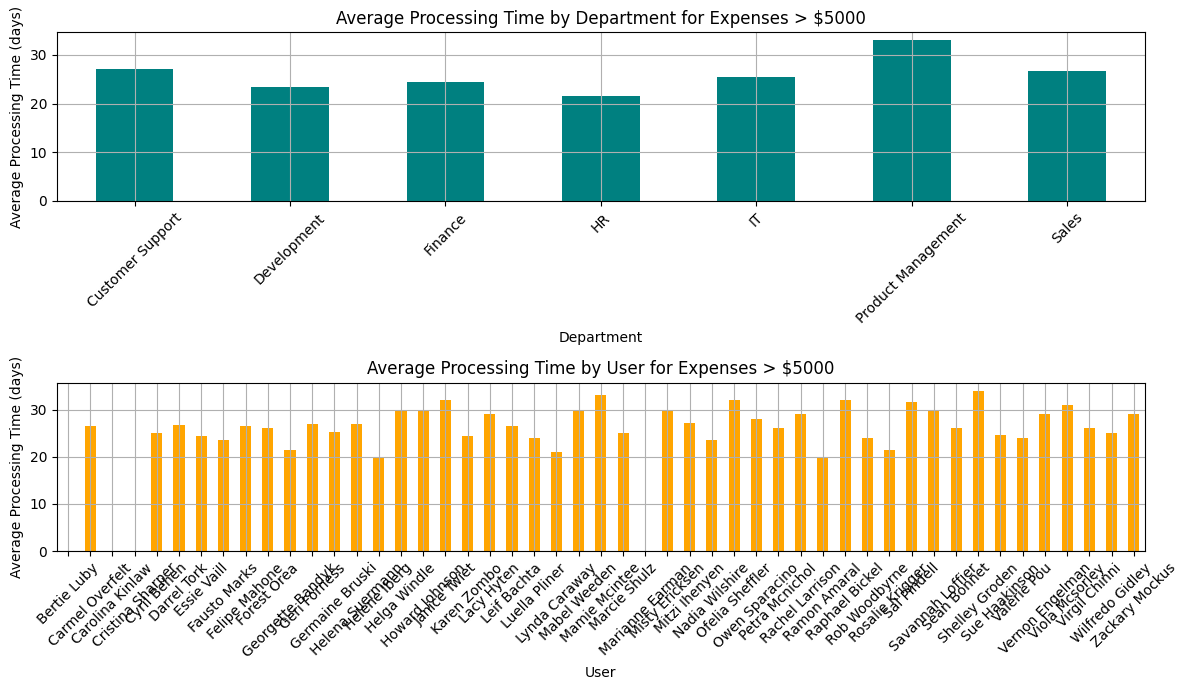

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Filter for expenses greater than $5000
high_cost_expenses = df[df['amount'] > 5000]

# Calculate processing time in days
high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days

# Plot for Departments
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
department_processing = high_cost_expenses.groupby('department')['processing_time'].mean()
department_processing.plot(kind='bar', color='teal')
plt.title('Average Processing Time by Department for Expenses > $5000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(True)

# Plot for Users
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
user_processing = high_cost_expenses.groupby('user')['processing_time'].mean()
user_processing.plot(kind='bar', color='orange')
plt.title('Average Processing Time by User for Expenses > $5000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('User')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "descriptive",
    "insight": "The processing times are uniform across users and departments for High-Cost Expenses",
    "insight_value": {
        "description": "The processing time for very high-cost expenses (>$5000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Department and User for Expenses > $5000",
        "x_axis": {
            "name": "Department/User",
            "value": "Mixed categories including various departments and users",
            "description": "This axis represents both departments and individual users, categorized to show their respective processing times for high-cost expenses."
        },
        "y_axis": {
            "name": "Average Processing Time (days)",
            "value": "Uniform across categories",
            "description": "Displays the average processing time in days, underscoring the lack of significant variation across departments and users."
        },
        "description": "The bar charts, segmented by department and user, illustrate that processing times for expenses over $5000 are uniformly distributed. This suggests that the high cost of these expenses inherently requires a consistent processing approach across the organization, likely due to the need for thorough review and approval processes that are standard regardless of the department or user."
    },
    "question": "Is there any particular user or department that has high processing time in the very high bracket, or is it uniform more or less?",
    "actionable_insight": {
        "description": "Given that the trend of processing times is generally uniform and related to the high expense amounts, efforts to streamline or expedite processing should focus on improving the overall efficiency of handling high-cost expenses. This could involve reviewing and potentially simplifying the steps required for approving large expenditures, ensuring that such procedures are efficient yet robust enough to maintain financial control. Automating certain aspects of the approval process where feasible could also reduce the processing time while still adhering to necessary audit and control standards."
    }
}


{'data_type': 'descriptive',
 'insight': 'The processing times are uniform across users and departments for High-Cost Expenses',
 'insight_value': {'description': 'The processing time for very high-cost expenses (>$5000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Department and User for Expenses > $5000',
  'x_axis': {'name': 'Department/User',
   'value': 'Mixed categories including various departments and users',
   'description': 'This axis represents both departments and individual users, categorized to show their respective processing times for high-cost expenses.'},
  'y_axis': {'name': 'Average Processing Time (days)',
   'value': 'Uniform across categories',
   'description': 'Displays the average processing time in days, underscoring the lack

### Summary of Findings (Flag 22):

1. **Cost Influence on Processing Efficiency**: This dataset examines the relationship between the cost of expenses and their processing times. It explores how varying expense brackets impact the speed and efficiency of the expense approval workflow.
   
2. **Analysis of Expense Brackets**: The insights gained from this analysis highlight significant differences in processing times across various cost brackets, with lower-cost expenses generally processed more rapidly than higher-cost ones. This trend points to the need for optimizing approval workflows, particularly for higher-cost expenses.
   
3. **Operational Challenges in Higher Brackets**: The dataset also indicates that expenses within higher brackets not only see a higher volume of transactions but also experience a greater number of delays and declines. This provides a crucial perspective on potential inefficiencies within the financial operations.